### Master of Applied Artificial Intelligence

**Course: TC4031 - Cloud Computing**

<img src="./../../../assets/logo.png" alt="Image Alt Text" width="500"/>

**Region growing**

Tutor: Dr. Eduardo Antonio Cendejas


Team members:
* Alejandro Calderon Aguilar - A01795353

In [44]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import cv2
from dotenv import load_dotenv
import os

# Load .env file
load_dotenv()

True

In [ ]:
def get_image(image_url):
    response = requests.get(image_url)
    try:
        image_array = np.asarray(bytearray(response.content))
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return bgr_image
    except Exception as e:
        print(e)
        return None
    
    
    
def plot_face_rectangles(image, faces):
    
    image = image.copy()
    
    for face in faces:
        rectangle = face["faceRectangle"]
        # comput bottom-right corner
        left = rectangle["left"]
        top = rectangle["top"]
        right = int(rectangle["width"]) + int(rectangle["left"])
        bottom = int(rectangle["height"]) + int(rectangle["top"])
        
        # draw the rectangle on the image
        cv2.rectangle(image, (left,top), (right,bottom), (255, 0,0), 3)
        
    return image
    
    
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray", hideAxis=True):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            if hideAxis:
                ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()
    


In [ ]:
subscription_key = os.getenv("MY_REG_FACE_APIKEY")
image_url = "https://github.com/ecendejas/imgMNA/blob/main/faces.jpg?raw=true"
image = get_image(image_url)

face_api_url = "https://gr-facerecog-api-python.cognitiveservices.azure.com/" + "/face/v1.0/detect"
headers = {
    "Ocp-Apim-Subscription-Key": subscription_key
}

params = {
    "returnFaceId": "false",
    "returnFaceLandmarks": "false"
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faceRectangles = json.dumps(response.json())
print(faceRectangles)

[{"faceRectangle": {"top": 159, "left": 118, "width": 94, "height": 94}}, {"faceRectangle": {"top": 111, "left": 492, "width": 90, "height": 90}}, {"faceRectangle": {"top": 153, "left": 18, "width": 84, "height": 84}}, {"faceRectangle": {"top": 166, "left": 386, "width": 81, "height": 81}}, {"faceRectangle": {"top": 158, "left": 235, "width": 76, "height": 76}}, {"faceRectangle": {"top": 163, "left": 323, "width": 68, "height": 68}}]


In [42]:
faceRectangles_array = json.loads(faceRectangles)
final_image = plot_face_rectangles(image, faceRectangles_array)

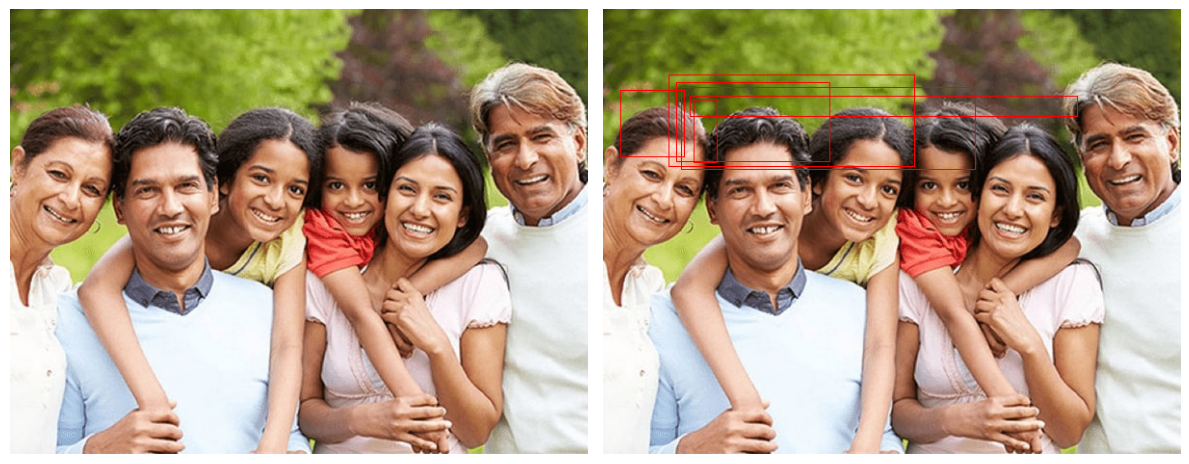

In [47]:
plot_images([image, final_image], cmap=None)